# BraTS 2018 Dataset

## 1. Data loading

Dependancy:
   * `pip install nibabel`

In [3]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import random
import dataset_brats as brats

### 1.1 Data directory

In [1]:
data_dir = 'E:\\大三下\\实践项目\\data\\MICCAI_BraTS_2019_Data_Training\\MICCAI_BraTS_2019_Data_Training'
HGG_dir = os.path.join(data_dir, 'HGG')
#LGG_dir = os.path.join(data_dir, 'LGG')

HGG_list = os.listdir(HGG_dir)

NameError: name 'os' is not defined

### 1.2 Show example slices

In [5]:
def show_nii(slices):
#     fig, axes = plt.subplots(1, len(slices))
#     for i, s in enumerate(slices):
#         axes[i].imshow(s.T, cmap="gray", origin="lower")
    plt.figure(figsize=(20, 10))
    fig, axes = plt.subplots(1, len(slices))
    for i, s in enumerate(slices):
        axes[i].imshow(s.T, cmap="gray", origin="lower")

F:\python_enviro\anaconda3\envs\env_py36\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """


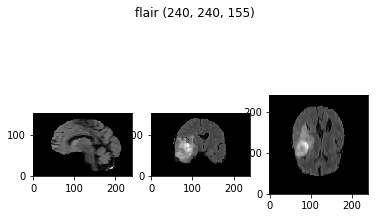

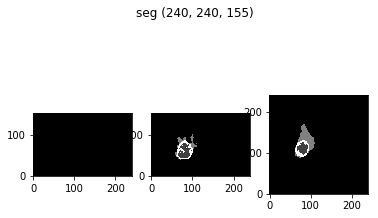

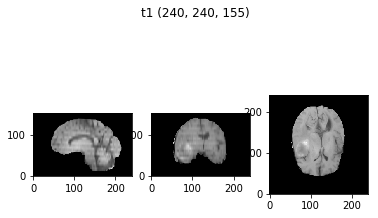

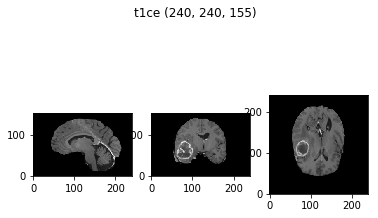

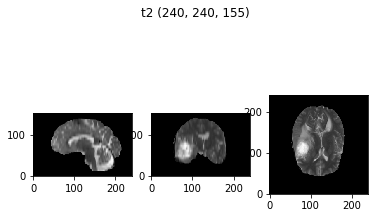

In [6]:
example = os.path.join(HGG_dir, HGG_list[0])
for img_full_name in os.listdir(example):
    mode = img_full_name.split('.')[0].split('_')[-1]
    img_path = os.path.join(example, img_full_name)
    img = nib.load(img_path).get_data()
    slice_1 = img[120, :, :]
    slice_2 = img[:, 120, :]
    slice_3 = img[:, :, 75]
    show_nii([slice_1, slice_2, slice_3])
    plt.suptitle(mode + " " + str(img.shape))
    plt.show()
    plt.figure()

### 1.3 Convert to numpy array (modalities to channels)

In [26]:
def load_nii(subject, mode):
    subject_name = os.listdir(subject)[0].split('.')[0].split('_')[:-1]
    subject_name.append(mode)
    img_full_name = '_'.join(subject_name) + '.nii.gz'
    img_path = os.path.join(subject, img_full_name)
    return nib.load(img_path).get_data()

In [27]:
subject = example
img = [load_nii(subject, 't1'), 
       load_nii(subject, 't1ce'), 
       load_nii(subject, 't2'),
       load_nii(subject, 'flair')]
seg = load_nii(subject, 'seg')

img = np.array(img, dtype=np.float32)
seg = np.array(seg)

F:\python_enviro\anaconda3\envs\env_py36\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


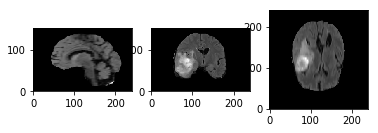

In [29]:
imgg = img[3]
slice_1 = imgg[120, :, :]
slice_2 = imgg[:, 120, :]
slice_3 = imgg[:, :, 75]
show_nii([slice_1, slice_2, slice_3])

## 2. Data preprocessing

In [30]:
config = dict()
config['crop_mode'] = 'center'
config['img_size'] = [128, 128, 128]
config['half_size'] = False

### 2.1 Crop image

In [31]:
def crop(img, seg):
    if config['crop_mode'] == "center":
        c1_l = int((240 - config['img_size'][0])/2)
        c2_l = int((240 - config['img_size'][1])/2)
        c3_l = int((155 - config['img_size'][2])/2)
    elif self.config['crop_mode'] == "random":
        c1_l = random.randint(0, 240 - config['img_size'][0])
        c2_l = random.randint(0, 240 - config['img_size'][1])
        c3_l = random.randint(0, 155 - config['img_size'][2])

    c1_r = int(c1_l + config['img_size'][0])
    c2_r = int(c2_l + config['img_size'][1])
    c3_r = int(c3_l + config['img_size'][2])

    img = img[:, c1_l: c1_r, c2_l: c2_r, c3_l: c3_r]
    seg = seg[c1_l: c1_r, c2_l: c2_r, c3_l: c3_r]

    if config['half_size']:
        img = img[:, ::2, ::2, ::2]
        seg = seg[::2, ::2, ::2]
    return img, seg

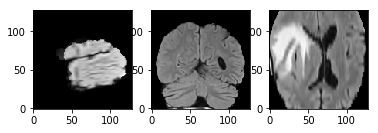

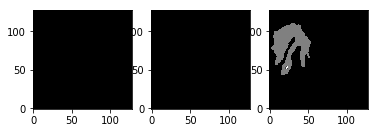

In [32]:
img_crop, seg_crop = crop(img, seg)
imgg = img_crop[3]
slice_1 = imgg[120, :, :]
slice_2 = imgg[:, 120, :]
slice_3 = imgg[:, :, 75]
show_nii([slice_1, slice_2, slice_3])
segg = seg_crop
slice_1 = segg[120, :, :]
slice_2 = segg[:, 120, :]
slice_3 = segg[:, :, 75]
show_nii([slice_1, slice_2, slice_3])

### 2.2 Seg to label

In [33]:
from dataset_brats import seg_label
label = seg_label(seg_crop)

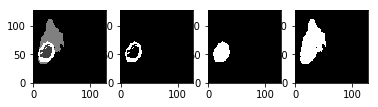

In [34]:
slice_0 = seg_crop[:, :, 65]
slice_1 = label[0, :, :, 65]
slice_2 = label[1, :, :, 65]
slice_3 = label[2, :, :, 65]
show_nii([slice_0, slice_1, slice_2, slice_3])

### 2.3 Random Mirror flip

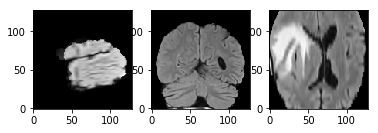

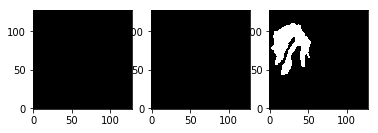

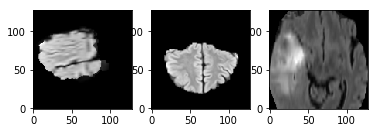

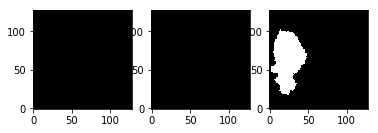

In [35]:
from dataset_brats import mirror_flip

img_flip, label_flip = mirror_flip(img_crop, label)

imgg = img_crop[3]
slice_1 = imgg[120, :, :]
slice_2 = imgg[:, 120, :]
slice_3 = imgg[:, :, 75]
show_nii([slice_1, slice_2, slice_3])
segg = label[2]
slice_1 = segg[120, :, :]
slice_2 = segg[:, 120, :]
slice_3 = segg[:, :, 75]
show_nii([slice_1, slice_2, slice_3])
imgg = img_flip[3]
slice_1 = imgg[120, :, :]
slice_2 = imgg[:, 120, :]
slice_3 = imgg[:, :, 75]
show_nii([slice_1, slice_2, slice_3])
segg = label_flip[2]
slice_1 = segg[120, :, :]
slice_2 = segg[:, 120, :]
slice_3 = segg[:, :, 75]
show_nii([slice_1, slice_2, slice_3])

### 2.4 Normalization

In [37]:
from dataset_brats import scale_non_zero #, scale_non_zero_old
config['upper_clip'] = 4000
img_scale = scale_non_zero(img_flip, config)

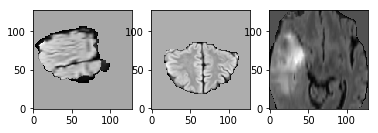

In [38]:
imgg = img_scale[3]
slice_1 = imgg[120, :, :]
slice_2 = imgg[:, 120, :]
slice_3 = imgg[:, :, 75]
show_nii([slice_1, slice_2, slice_3])

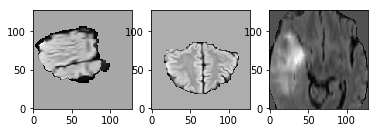

In [44]:
img_scale_old = scale_non_zero(img_flip, config)
imgg = img_scale[3]
slice_1 = imgg[120, :, :]
slice_2 = imgg[:, 120, :]
slice_3 = imgg[:, :, 75]
show_nii([slice_1, slice_2, slice_3])

### 2.5 Intensity shift

In [41]:
from dataset_brats import intensity_shift_non_zero
img_shift = intensity_shift_non_zero(img_scale)

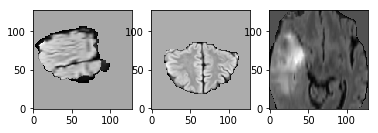

In [42]:
imgg = img_shift[3]
slice_1 = imgg[120, :, :]
slice_2 = imgg[:, 120, :]
slice_3 = imgg[:, :, 75]
show_nii([slice_1, slice_2, slice_3])

In [43]:
def slice_and_show(img):
    imgg = img[3]
    slice_1 = imgg[120, :, :]
    slice_2 = imgg[:, 120, :]
    slice_3 = imgg[:, :, 75]
    show_nii([slice_1, slice_2, slice_3])

## 3. Transformations 

In [20]:
from tools.transforms import nonlinear_transform, local_pixel_shuffling, image_in_painting
import copy

In [32]:
def generate_pair(img):
    img_rows, img_cols, img_deps = img.shape[0], img.shape[1], img.shape[2]
    y = img
    x = copy.deepcopy(y)
    slice_and_show(x)
    
    # Local Shuffle Pixel
    x = local_pixel_shuffling(x, prob=2, size_factor=10, num_block=5000)
    slice_and_show(x)

    # Apply non-Linear transformation with an assigned probability
    x = nonlinear_transform(x, 2)
    slice_and_show(x)
    
    # Inpainting
    x1 = image_in_painting(x)
    slice_and_show(x1)   

<Figure size 1440x720 with 0 Axes>

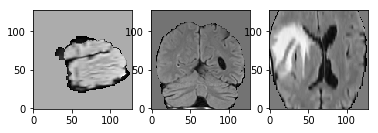

<Figure size 1440x720 with 0 Axes>

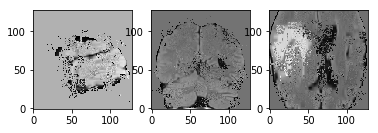

<Figure size 1440x720 with 0 Axes>

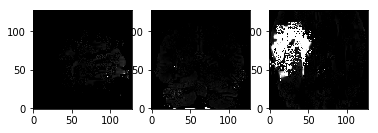

<Figure size 1440x720 with 0 Axes>

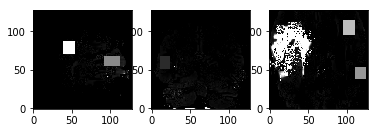

In [33]:
generate_pair(img_shift)